### This notebook contains plots examining what relationship exists, if any, between LRG mass and the number of satellites it possesses. 

#### Mindy Townsned
#### Last edit: 23 July 2018

In [1]:
run ~/anaconda/GitHub/lrg-project/statSub_Mark2.py

end data parsing
end CosmoCalc
end surface density calculation
end near neighbor calculation
(1151, 10, 10)
(1151,)
end background galaxy calculation
1151
end satellite galaxy calculation
end of program


In [14]:
sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

In [15]:
sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

In [9]:
# Read in data
data = open('/Users/mtownsend/anaconda/Github/lrg-project/lrg_project_masses2.txt', 'r') 
lines = data.readlines()[23:] # start reading at line 24

data.close() 

# Create array
mass_mod = []
z_mod = []

# Append data to the array
for line in lines:
    p = line.split()
    z_mod.append(float(p[0]))
    mass_mod.append(float(p[2]))
    
# print(z_mod)
# print(mass_mod)

In [10]:
# gives index for model redshifts in LRG order

temp = []
for i in range(len(z_LRG)):
    temp.append(min(range(len(z_mod)), key=lambda j:abs(z_mod[j] - z_LRG[i])))
    
# gives model masses in LRG order

mass_LRG = []
for i in range(len(temp)):
    mass_LRG.append(mass_mod[int(temp[i])])

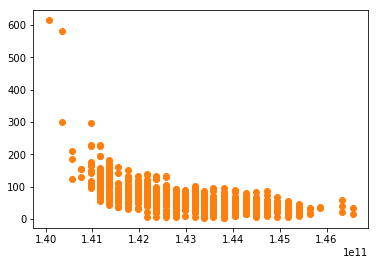

In [16]:
plt.scatter(mass_LRG, sumsat)
plt.show()

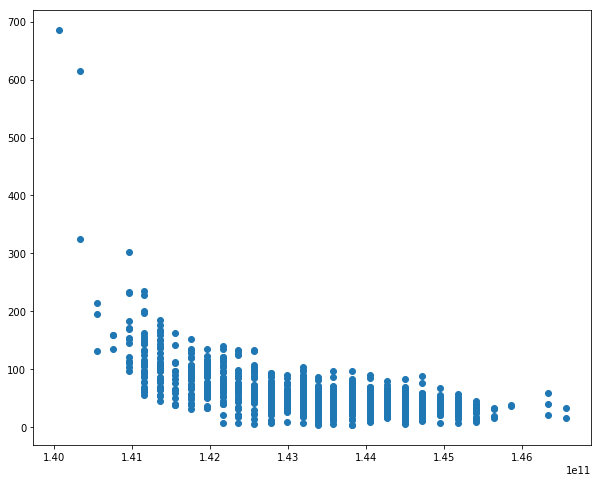

In [19]:
plt.scatter(mass_LRG, sumnear)
plt.show()